In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

## 1- Preprocessing

In [3]:
df = pd.read_csv('E:\\apartment\\immo_data.csv')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [6]:
df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)], inplace=True)
df.shape

(268850, 42)

In [7]:
df.drop(df[df['livingSpace'] == 0.0].index, inplace=True)
df.shape

(268775, 42)

In [8]:
df.drop(df[df['totalRent'] == 0.0].index, inplace=True)
df.shape

(268544, 42)

In [9]:
df.drop(columns=['facilities','description','streetPlain','scoutId','street','streetPlain','firingTypes','houseNumber','date'], inplace=True)
df.shape

(268544, 34)

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print('{} : {}'.format(column,df[column].nunique()))

regio1 : 16
heatingType : 13
telekomTvOffer : 3
geo_bln : 16
geo_krs : 419
condition : 10
interiorQual : 4
petsAllowed : 3
typeOfFlat : 10
regio2 : 419
regio3 : 8683


In [11]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268544 entries, 0 to 268849
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268544 non-null  object 
 1   serviceCharge         268544 non-null  float64
 2   heatingType           223716 non-null  object 
 3   telekomTvOffer        235964 non-null  object 
 4   newlyConst            268544 non-null  bool   
 5   balcony               268544 non-null  bool   
 6   picturecount          268544 non-null  int64  
 7   pricetrend            268544 non-null  float64
 8   telekomUploadSpeed    268544 non-null  float64
 9   totalRent             268544 non-null  float64
 10  yearConstructed       268544 non-null  float64
 11  hasKitchen            268544 non-null  bool   
 12  geo_bln               268544 non-null  object 
 13  cellar                268544 non-null  bool   
 14  yearConstructedRange  268544 non-null  float64
 15  

In [13]:
df.drop(columns=['geo_plz', 'telekomUploadSpeed', 'telekomTvOffer', 'noRoomsRange', 'geo_bln'], inplace=True)
df.shape

(268544, 29)

In [14]:
df.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,840.000000,1965.0,False,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,4.0,181.40000,1.000000,3.000000,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,902.268665,1871.0,False,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,3.0,114.72574,2.122786,3.574554,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,1300.000000,2019.0,False,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,3.0,114.72574,3.000000,4.000000,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,902.268665,1964.0,False,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,3.0,86.00000,3.000000,3.574554,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,903.000000,1950.0,False,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,3.0,188.90000,1.000000,3.574554,False,4,Bremen,Neu_Schwachhausen


In [15]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(265360, 29)

In [16]:
for column in df.columns:
  print(df[column].dtype)

object
float64
object
bool
bool
int64
float64
float64
float64
bool
bool
float64
float64
float64
object
object
object
object
bool
int64
object
float64
float64
float64
float64
bool
int64
object
object


In [17]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        upper = df[column].mean() + 3 * df[column].std()
        lower = df[column].mean() - 3 * df[column].std()
        rows = df[(df[column] > upper) | (df[column] < lower)].index

        df.drop(rows, inplace=True)
  

In [18]:
df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              42783
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
totalRent                    0
yearConstructed              0
hasKitchen                   0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
geo_krs                      0
condition                65004
interiorQual            106950
petsAllowed             108488
lift                         0
baseRentRange                0
typeOfFlat               34757
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
garden                       0
livingSpaceRange             0
regio2                       0
regio3                       0
dtype: int64

In [19]:
df_copy = df.copy(deep=True)
df_copy.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,840.000000,1965.0,False,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,4.0,181.40000,1.000000,3.000000,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,902.268665,1871.0,False,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,3.0,114.72574,2.122786,3.574554,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,1300.000000,2019.0,False,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,3.0,114.72574,3.000000,4.000000,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,902.268665,1964.0,False,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,3.0,86.00000,3.000000,3.574554,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,903.000000,1950.0,False,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,3.0,188.90000,1.000000,3.574554,False,4,Bremen,Neu_Schwachhausen


In [20]:
df['regio1'].value_counts()

Nordrhein_Westfalen       60089
Sachsen                   55595
Bayern                    20381
Sachsen_Anhalt            19466
Hessen                    16809
Niedersachsen             15883
Baden_Württemberg         15360
Thüringen                  8133
Rheinland_Pfalz            8040
Berlin                     7748
Brandenburg                6634
Mecklenburg_Vorpommern     6430
Schleswig_Holstein         6332
Hamburg                    3549
Bremen                     2876
Saarland                   1352
Name: regio1, dtype: int64

In [21]:
index_list = list(df['regio1'].value_counts().tail(9).index)  

In [22]:
def update(column):
    if column in index_list:
        return 'other'
    return column

In [23]:
starting_time = time.time()
df['updated_regio1'] = df['regio1'].apply(update)
single_processing = time.time() - starting_time
df.drop(columns=['regio1'], inplace=True)
df['updated_regio1'].value_counts() 

Nordrhein_Westfalen    60089
Sachsen                55595
other                  51094
Bayern                 20381
Sachsen_Anhalt         19466
Hessen                 16809
Niedersachsen          15883
Baden_Württemberg      15360
Name: updated_regio1, dtype: int64

In [24]:
print(single_processing)

0.06467008590698242


In [25]:
df['regio2'].value_counts()

Leipzig                         13123
Chemnitz                        12074
Berlin                           7748
Dresden                          7260
Magdeburg                        4691
                                ...  
Schweinfurt_Kreis                  27
Haßberge_Kreis                     21
Freyung_Grafenau_Kreis             20
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      11
Name: regio2, Length: 419, dtype: int64

In [26]:
index_list = list(df['regio2'].value_counts().tail(405).index)
df['updated_regio2'] = df['regio2'].apply(update)
df.drop(columns=['regio2'], inplace=True)
df['updated_regio2'].value_counts()   

other                  176894
Leipzig                 13123
Chemnitz                12074
Berlin                   7748
Dresden                  7260
Magdeburg                4691
Halle_Saale              4383
Essen                    4103
München                  3997
Frankfurt_am_Main        3937
Hamburg                  3549
Düsseldorf               3505
Duisburg                 3376
Dortmund                 3020
Mittelsachsen_Kreis      3017
Name: updated_regio2, dtype: int64

In [27]:
df['regio3'].value_counts()

Innenstadt         4509
Stadtmitte         2598
Altstadt           2208
Sonnenberg         1865
Kaßberg            1659
                   ... 
Alkersum              1
Bennstedt             1
Oberschweinbach       1
Blindheim             1
Aresing               1
Name: regio3, Length: 8585, dtype: int64

In [28]:
index_list = list(df['regio3'].value_counts().tail(8500).index)
df['updated_regio3'] = df['regio3'].apply(update)
df.drop(columns=['regio3'], inplace=True)
df['updated_regio3'].value_counts()   

other                 198203
Innenstadt              4509
Stadtmitte              2598
Altstadt                2208
Sonnenberg              1865
                       ...  
Nördliche_Neustadt       371
Hildesheim               370
West                     367
Lüdenscheid              364
Gohlis_Nord              364
Name: updated_regio3, Length: 86, dtype: int64

In [29]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,livingSpaceRange,updated_regio1,updated_regio2,updated_regio3
0,245.00,central_heating,False,False,6,4.62,840.000000,1965.0,False,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,4.0,181.40000,1.000000,3.000000,True,4,Nordrhein_Westfalen,Dortmund,other
1,134.00,self_contained_central_heating,False,True,8,3.47,902.268665,1871.0,False,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,3.0,114.72574,2.122786,3.574554,False,4,other,other,other
2,255.00,floor_heating,True,True,8,2.72,1300.000000,2019.0,False,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,3.0,114.72574,3.000000,4.000000,False,4,Sachsen,Dresden,other
3,58.15,district_heating,False,True,9,1.53,902.268665,1964.0,False,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,3.0,86.00000,3.000000,3.574554,False,2,Sachsen,Mittelsachsen_Kreis,Freiberg
4,138.00,self_contained_central_heating,False,True,19,2.46,903.000000,1950.0,False,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,3.0,188.90000,1.000000,3.574554,False,4,other,other,other


In [30]:
df.drop(columns=['petsAllowed', 'geo_krs', 'condition'], inplace=True)
df.shape

(254677, 26)

In [31]:
df['heatingType'].fillna(df['heatingType'].mode()[0], inplace=True)
df['interiorQual'].fillna(df['interiorQual'].mode()[0], inplace=True)
df['typeOfFlat'].fillna(df['typeOfFlat'].mode()[0], inplace=True)


In [32]:
df.isna().sum()

serviceCharge           0
heatingType             0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
totalRent               0
yearConstructed         0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
interiorQual            0
lift                    0
baseRentRange           0
typeOfFlat              0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
garden                  0
livingSpaceRange        0
updated_regio1          0
updated_regio2          0
updated_regio3          0
dtype: int64

In [33]:
df['heatingType'].value_counts()

central_heating                   165193
district_heating                   23422
gas_heating                        18932
self_contained_central_heating     17713
floor_heating                      16591
oil_heating                         4816
heat_pump                           2627
combined_heat_and_power_plant       1885
night_storage_heater                1270
wood_pellet_heating                  915
electric_heating                     854
stove_heating                        302
solar_heating                        157
Name: heatingType, dtype: int64

In [34]:
index_list = list(df['heatingType'].value_counts().tail(8).index)
df['updated_heatingType'] = df['heatingType'].apply(update)
df.drop(columns=['heatingType'], inplace=True)
df['updated_heatingType'].value_counts()

central_heating                   165193
district_heating                   23422
gas_heating                        18932
self_contained_central_heating     17713
floor_heating                      16591
other                              12826
Name: updated_heatingType, dtype: int64

In [35]:
df['typeOfFlat'].value_counts()

apartment              159140
roof_storey             33152
ground_floor            30086
other                    9027
maisonette               8585
raised_ground_floor      5399
penthouse                3271
terraced_flat            3177
half_basement            1964
loft                      876
Name: typeOfFlat, dtype: int64

In [36]:
index_list = list(df['typeOfFlat'].value_counts().tail(7).index)
df['updated_typeOfFlat'] = df['typeOfFlat'].apply(update)
df.drop(columns=['typeOfFlat'], inplace=True)
df['updated_typeOfFlat'].value_counts()

apartment       159140
roof_storey      33152
other            32299
ground_floor     30086
Name: updated_typeOfFlat, dtype: int64

## 2: Data Visulization

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254677 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         254677 non-null  float64
 1   newlyConst            254677 non-null  bool   
 2   balcony               254677 non-null  bool   
 3   picturecount          254677 non-null  int64  
 4   pricetrend            254677 non-null  float64
 5   totalRent             254677 non-null  float64
 6   yearConstructed       254677 non-null  float64
 7   hasKitchen            254677 non-null  bool   
 8   cellar                254677 non-null  bool   
 9   yearConstructedRange  254677 non-null  float64
 10  baseRent              254677 non-null  float64
 11  livingSpace           254677 non-null  float64
 12  interiorQual          254677 non-null  object 
 13  lift                  254677 non-null  bool   
 14  baseRentRange         254677 non-null  int64  
 15  

In [38]:
df.describe()

,serviceCharge,picturecount,pricetrend,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,livingSpaceRange
count,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000,254677.000000
mean,148.906198,9.391284,3.321719,814.697472,1967.901314,3.724828,633.902392,72.968869,3.715475,2.619179,112.564203,2.070356,3.504590,3.051096
std,81.108617,5.502439,1.853113,523.974021,33.682238,2.412433,486.086939,31.111296,2.187344,0.969525,35.914764,1.361657,1.374650,1.388935
min,0.000000,0.000000,-2.440000,1.000000,1842.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000
25%,96.000000,6.000000,1.980000,491.720000,1959.000000,2.000000,335.000000,54.000000,2.000000,2.000000,97.350000,1.000000,3.000000,2.000000
50%,139.000000,9.000000,3.370000,730.000000,1966.411388,3.715457,485.000000,67.000000,3.000000,3.000000,114.725740,2.000000,3.574554,3.000000
75%,183.000000,12.000000,4.510000,902.268665,1992.000000,5.000000,784.000000,86.000000,5.000000,3.000000,116.000000,3.000000,4.000000,4.000000
max,1057.500000,28.000000,9.210000,64651.000000,2090.000000,9.000000,39200.000000,649.000000,9.000000,10.000000,258.500000,11.000000,19.000000,7.000000


In [39]:
df['total_rent'] = df['totalRent'].copy(deep=True)
df.total_rent

0          840.000000
1          902.268665
2         1300.000000
3          902.268665
4          903.000000
             ...     
268845     910.000000
268846    1150.000000
268847     930.000000
268848    1015.000000
268849     902.268665
Name: total_rent, Length: 254677, dtype: float64

In [40]:
df.drop(columns=['totalRent'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254677 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         254677 non-null  float64
 1   newlyConst            254677 non-null  bool   
 2   balcony               254677 non-null  bool   
 3   picturecount          254677 non-null  int64  
 4   pricetrend            254677 non-null  float64
 5   yearConstructed       254677 non-null  float64
 6   hasKitchen            254677 non-null  bool   
 7   cellar                254677 non-null  bool   
 8   yearConstructedRange  254677 non-null  float64
 9   baseRent              254677 non-null  float64
 10  livingSpace           254677 non-null  float64
 11  interiorQual          254677 non-null  object 
 12  lift                  254677 non-null  bool   
 13  baseRentRange         254677 non-null  int64  
 14  noRooms               254677 non-null  float64
 15  

In [41]:
import seaborn as sns

<AxesSubplot:>

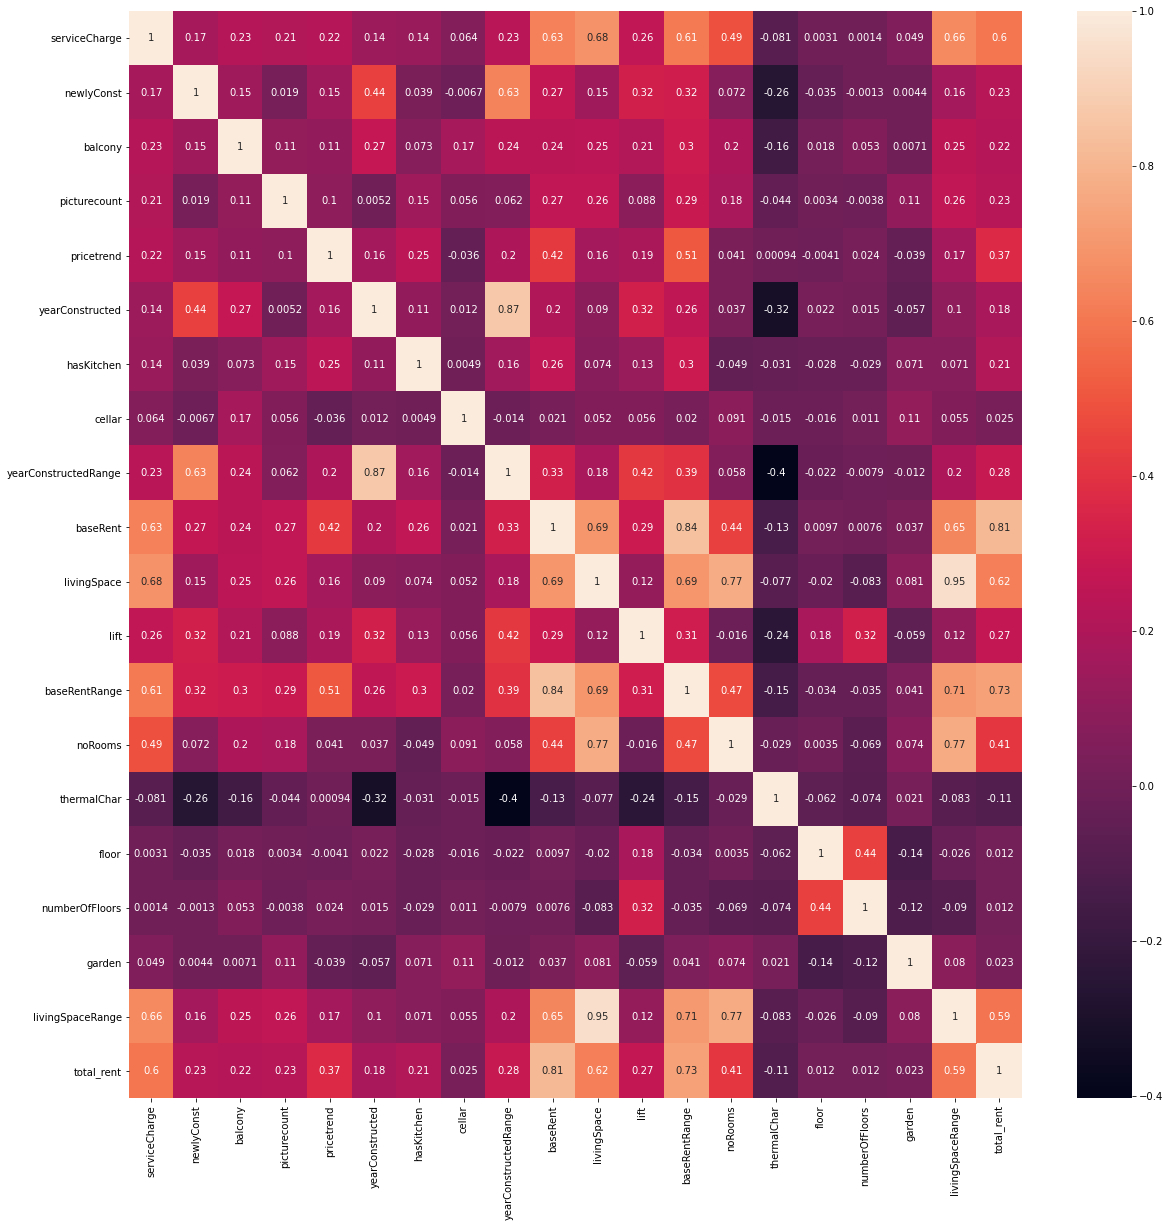

In [42]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

Different regions

In [43]:
def regions_plot(column, region_number):
    column.value_counts().plot.barh(title='Region {}'.format(region_number))

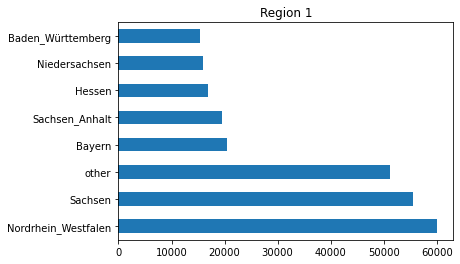

In [44]:
regions_plot(df.updated_regio1, 1)

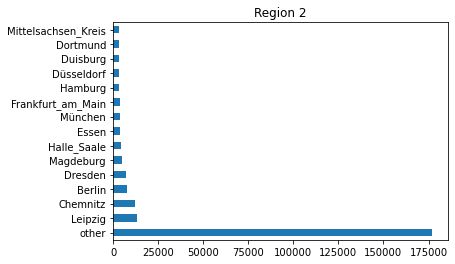

In [45]:
regions_plot(df.updated_regio2, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254677 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         254677 non-null  float64
 1   newlyConst            254677 non-null  bool   
 2   balcony               254677 non-null  bool   
 3   picturecount          254677 non-null  int64  
 4   pricetrend            254677 non-null  float64
 5   yearConstructed       254677 non-null  float64
 6   hasKitchen            254677 non-null  bool   
 7   cellar                254677 non-null  bool   
 8   yearConstructedRange  254677 non-null  float64
 9   baseRent              254677 non-null  float64
 10  livingSpace           254677 non-null  float64
 11  interiorQual          254677 non-null  object 
 12  lift                  254677 non-null  bool   
 13  baseRentRange         254677 non-null  int64  
 14  noRooms               254677 non-null  float64
 15  

<AxesSubplot:title={'center':'Type of flat'}>

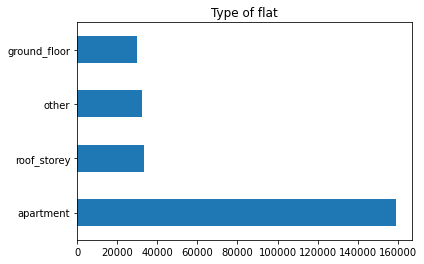

In [47]:
df.updated_typeOfFlat.value_counts().plot.barh(title='Type of flat')

In [48]:
df_numerics = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64')]

In [49]:
def print_barplot(column):
    plt.figure(figsize=(20, 20))
    sns.barplot(column, 'total_rent', data=df, ci=False)

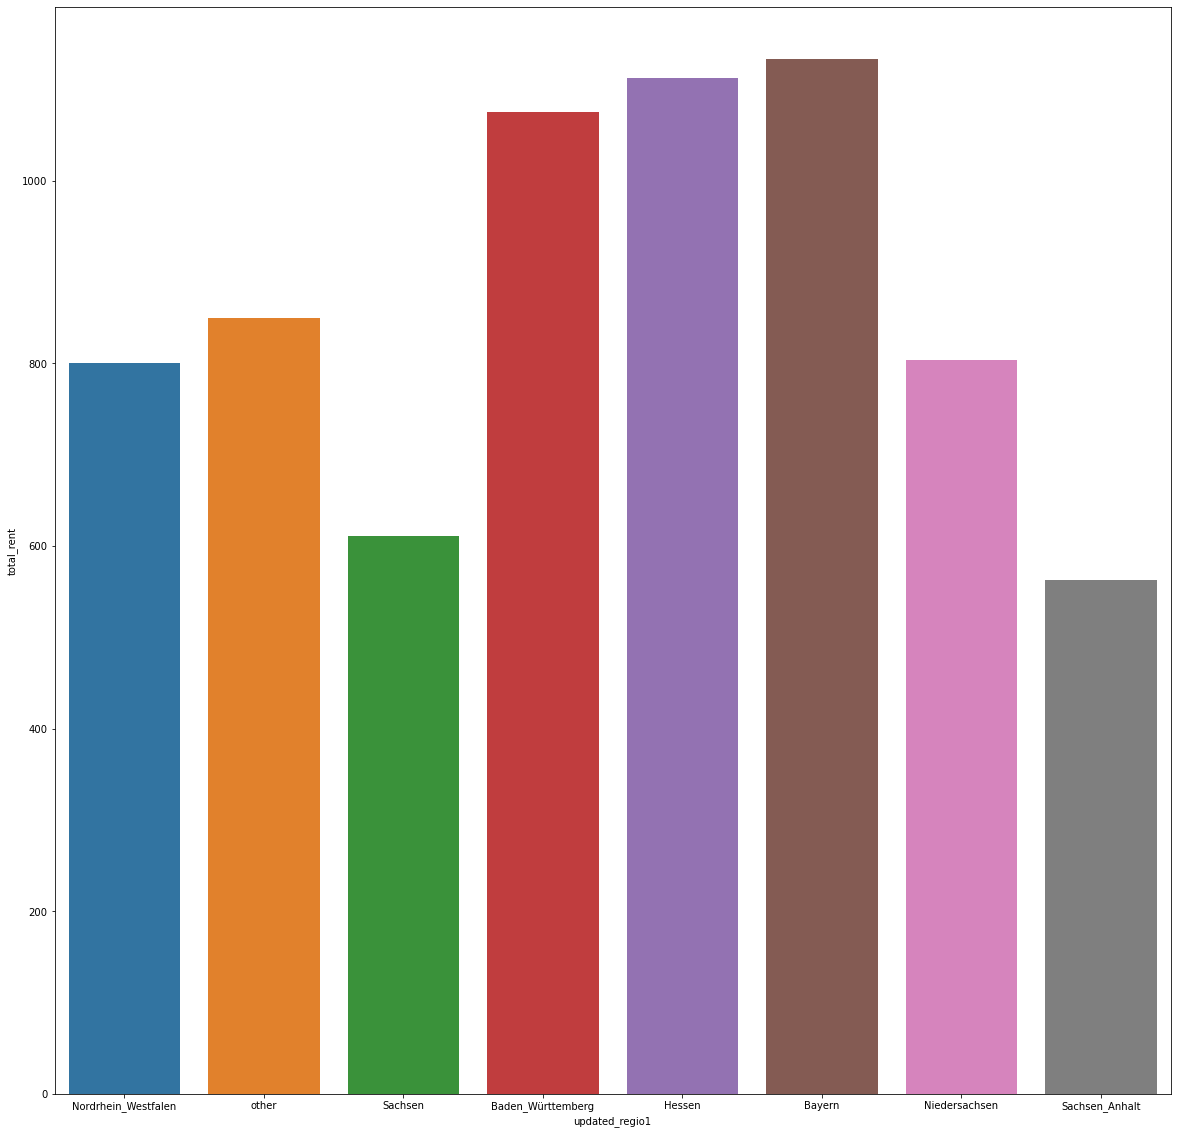

In [50]:
print_barplot('updated_regio1')

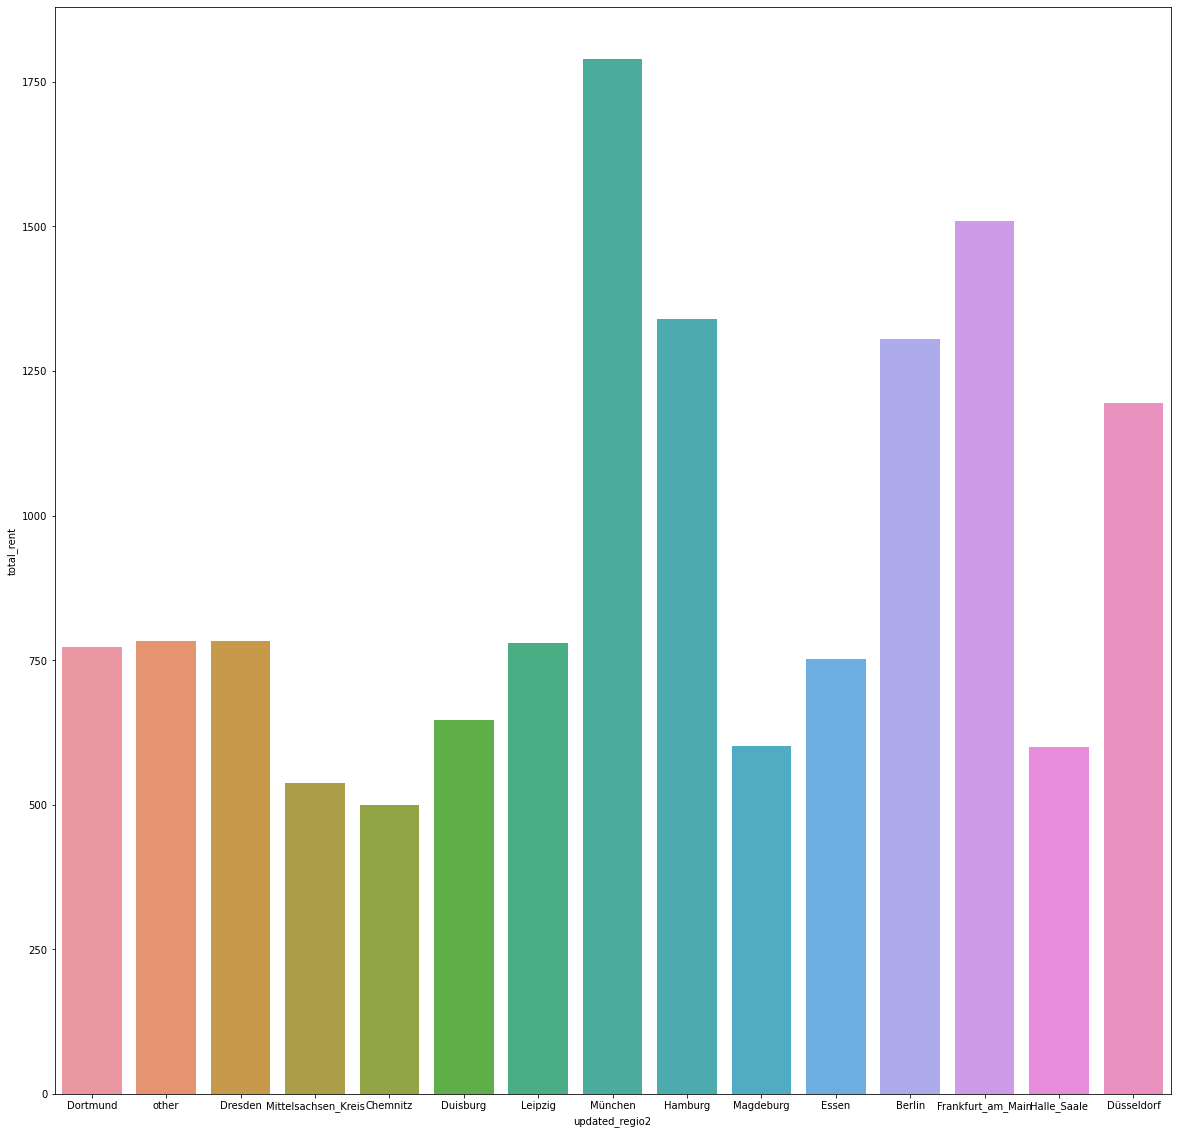

In [51]:
print_barplot('updated_regio2')

## 3- Training

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
columns = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        columns.append(col)
        
dummies_feature = pd.get_dummies(df[columns])
df = pd.concat([df, dummies_feature], axis=1)

df.drop(columns=columns, inplace=True)

In [54]:
df.head()

,serviceCharge,picturecount,pricetrend,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,livingSpaceRange,total_rent,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,updated_regio1_Baden_Württemberg,updated_regio1_Bayern,updated_regio1_Hessen,updated_regio1_Niedersachsen,updated_regio1_Nordrhein_Westfalen,updated_regio1_Sachsen,updated_regio1_Sachsen_Anhalt,updated_regio1_other,updated_regio2_Berlin,updated_regio2_Chemnitz,updated_regio2_Dortmund,updated_regio2_Dresden,updated_regio2_Duisburg,updated_regio2_Düsseldorf,updated_regio2_Essen,updated_regio2_Frankfurt_am_Main,updated_regio2_Halle_Saale,updated_regio2_Hamburg,updated_regio2_Leipzig,updated_regio2_Magdeburg,updated_regio2_Mittelsachsen_Kreis,updated_regio2_München,updated_regio2_other,updated_regio3_Altenburg,updated_regio3_Altendorf,updated_regio3_Altlindenau,updated_regio3_Altstadt,updated_regio3_Annaberg_Buchholz,updated_regio3_Bahnhofsvorstadt,updated_regio3_Barmen,updated_regio3_Bautzen,updated_regio3_Bernsdorf,updated_regio3_Bogenhausen,updated_regio3_Borna,updated_regio3_Charlottenburg_Charlottenburg,updated_regio3_Connewitz,updated_regio3_Cracau,updated_regio3_Döbeln,updated_regio3_Elberfeld,updated_regio3_Freiberg,updated_regio3_Freital,updated_regio3_Friedrichstadt,updated_regio3_Gablenz,updated_regio3_Gießen,updated_regio3_Gladbeck,updated_regio3_Gohlis_Mitte,updated_regio3_Gohlis_Nord,updated_regio3_Gohlis_Süd,updated_regio3_Gotha,updated_regio3_Göttingen,updated_regio3_Halberstadt,updated_regio3_Hilbersdorf,updated_regio3_Hildesheim,updated_regio3_Innenstadt,updated_regio3_Iserlohn,updated_regio3_Kappel,updated_regio3_Kaßberg,updated_regio3_Lausen_Grünau,updated_regio3_Lehe,updated_regio3_Lutherstadt_Wittenberg,updated_regio3_Lutherviertel,updated_regio3_Lüdenscheid,updated_regio3_Marburg,updated_regio3_Marl,updated_regio3_Meißen,updated_regio3_Merseburg,updated_regio3_Mitte,updated_regio3_Mitte_Mitte,updated_regio3_Mitte_Nord,updated_regio3_Möckern,updated_regio3_Naumburg_Saale,updated_regio3_Neue_Neustadt,updated_regio3_Neuss,updated_regio3_Neustadt,updated_regio3_Nordvorstadt,updated_regio3_Nördliche_Neustadt,updated_regio3_Paderborn,updated_regio3_Pirna,updated_regio3_Plagwitz,updated_regio3_Recklinghausen,updated_regio3_Reudnitz_Thonberg,updated_regio3_Riesa,updated_regio3_Saarbrücken,updated_regio3_Schloßchemnitz,updated_regio3_Schönefeld_Abtnaundorf,updated_regio3_Siegen,updated_regio3_Silberhöhe,updated_regio3_Sonnenberg,updated_regio3_Spandau_Spandau,updated_regio3_Stadtfeld_Ost,updated_regio3_Stadtmitte,updated_regio3_Stendal,updated_regio3_Stötteritz,updated_regio3_Sudenburg,updated_regio3_Süd,updated_regio3_Südliche_Innenstadt,updated_regio3_Südliche_Neustadt,updated_regio3_Südstadt,updated_regio3_Südvorstadt,updated_regio3_Tiergarten_Tiergarten,updated_regio3_Volkmarsdorf,updated_regio3_Werdau,updated_regio3_West,updated_regio3_Weststadt,updated_regio3_Witten,updated_regio3_Zeitz,updated_regio3_Zentrum,updated_regio3_Zentrum_West,updated_regio3_other,updated_heatingType_central_heating,updated_heatingType_district_heating,updated_heatingType_floor_heating,updated_heatingType_gas_heating,updated_heatingType_other,updated_heatingType_self_contained_central_heating,updated_typeOfFlat_apartment,updated_typeOfFlat_ground_floor,updated_typeOfFlat_other,updated_typeOfFlat_roof_storey
0,245.00,6,4.62,1965.0,2.0,595.0,86.00,4,4.0,181.40000,1.000000,3.000000,4,840.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,134.00,8,3.47,1871.0,1.0,800.0,89.00,5,3.0,114.72574,2.122786,3.574554,4,902.268665,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
y = df['total_rent']
x = df.drop('total_rent', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
standard_scaler = StandardScaler()

In [59]:
numeric_x_train = pd.DataFrame()
for column in x_train.columns:
    if (x_train[column].dtype == 'int64' or x_train[column].dtype == 'float64') and not x_train[column].isin([0, 1]).all():
        numeric_x_train[column] = x_train[column].copy(deep=False)

numeric_x_train  = standard_scaler.fit_transform(numeric_x_train)        

In [60]:
numeric_x_test = pd.DataFrame()
for column in x_test.columns:
    if (x_test[column].dtype == 'int64' or x_test[column].dtype == 'float64') and not x_test[column].isin([0, 1]).all():
        numeric_x_test[column] = x_test[column].copy(deep=False)

numeric_x_test = standard_scaler.transform(numeric_x_test)        

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
linear_regression = LinearRegression()

In [63]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = linear_regression.predict(x_test)

In [65]:
metrics.mean_absolute_error(y_test, y_pred)

112.79414820155971

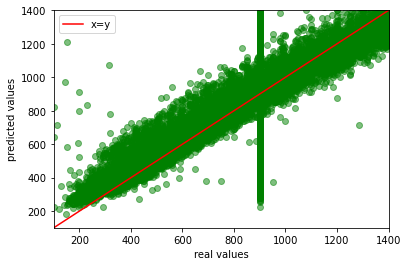

In [66]:
plt.plot((0, 2000), (0, 2000), 'r', label='x=y')
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.legend()
plt.axis([100, 1400, 100, 1400])
plt.show()

## 4- Multiprocessing

In [67]:
from multiprocessing import Pool, cpu_count

In [68]:
multi_df = df_copy.copy(deep=True)

In [69]:
starting_time = time.time()
with Pool(cpu_count()) as p:
    p.imap(multi_df['regio1'].apply(update), [])
multiprocessing = time.time() - starting_time
multiprocessing

0.23775863647460938

## 5: Dask

In [70]:
import dask.dataframe as dd

In [71]:
dask_df = df_copy.copy(deep=True)

In [72]:
ddf = dd.from_pandas(dask_df, npartitions=6)

In [73]:
starting_time = time.time()
ddf['updated_regio1'] = ddf['regio1'].apply(update)
dask_processing = time.time() - starting_time
dask_processing

0.012067317962646484

### Compare different kind of processing

In [74]:
print('single processing : {}'.format(single_processing))
print('multi-processing : {}'.format(multiprocessing))
print('dask processing : {}'.format(dask_processing))

single processing : 0.06467008590698242
multi-processing : 0.23775863647460938
dask processing : 0.012067317962646484


We conclude that processing with dask is the fastest way!